In [25]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import csv

In [26]:

def calculate_mean_intensity(paths):
    mean_intensity_list = [io.imread(image_path).mean() for image_path in paths]
    return mean_intensity_list

def get_concentration(calibration_curve_paths, mean_intensity_list):
    mean_intensity_calibration_curve_list = [io.imread(image_path).mean() for image_path in calibration_curve_paths]

    sample_concentration_values = [0, 2, 5, 10, 20, 40, 80, 160, 320]
    df = pd.DataFrame({
        "Protein Concentration (microgram / milliliter)": sample_concentration_values,
        "Mean Intensity": mean_intensity_calibration_curve_list
    })

    slope, intercept = np.polyfit(df["Protein Concentration (microgram / milliliter)"], df["Mean Intensity"], 1)

    protein_concentration_list = [(mean_intensity - intercept) / slope for mean_intensity in mean_intensity_list]
    return protein_concentration_list

def construct_data_frame(mean_intensity_list, protein_concentration_list, time_interval, droplet_volume):
    adjusted_mean_intensity_list = [x - min(mean_intensity_list) for x in mean_intensity_list]
    adjusted_protein_concentration_list = [x - min(protein_concentration_list) for x in protein_concentration_list]

    number_of_protein_molecules_list = [conc * droplet_volume * 6000000000 for conc in protein_concentration_list]

    p_vals = np.array(number_of_protein_molecules_list)
    length = len(number_of_protein_molecules_list)
    max_time_value = (length - 1) * time_interval
    t_vals = np.linspace(0, max_time_value, length)
    dp_dt = np.gradient(p_vals, t_vals)

    df = pd.DataFrame({
        "Time (min)": np.arange(len(mean_intensity_list)) * time_interval,
        "Mean Intensity": adjusted_mean_intensity_list,
        "Protein Concentration (microgram / milliliter)": adjusted_protein_concentration_list,
        "Number of Protein Molecules": number_of_protein_molecules_list,
        "Rate of Change of Protein Molecules": dp_dt
    })

    return df

def save_data_to_csv(df, file_name):
    df.to_csv(file_name, index=False)

def read_data_and_generate_plots(file_name):
    df = pd.read_csv(file_name)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (min)'], df['Mean Intensity'], marker='o')
    plt.title('Mean Intensity vs Time')
    plt.xlabel('Time (min)')
    plt.ylabel('Mean Intensity')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (min)'], df['Protein Concentration (microgram / milliliter)'], marker='o')
    plt.title('Protein Concentration vs Time')
    plt.xlabel('Time (min)')
    plt.ylabel('Protein Concentration (microgram / milliliter)')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (min)'], df['Number of Protein Molecules'], marker='o')
    plt.title('Number of Protein Molecules vs Time')
    plt.xlabel('Time (min)')
    plt.ylabel('Number of Protein Molecules')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (min)'], df['Rate of Change of Protein Molecules'], marker='o', color="green")
    plt.title('Rate of Change of Protein Molecules vs Time')
    plt.xlabel('Time (min)')
    plt.ylabel('Rate of Change of Protein Molecules')
    plt.grid(True)
    plt.show()

def analyze_protein(paths, calibration_curve_paths, time_interval, droplet_volume, filename):
    mean_intensity_list = calculate_mean_intensity(paths)
    protein_concentration_list = get_concentration(calibration_curve_paths, mean_intensity_list)
    df = construct_data_frame(mean_intensity_list, protein_concentration_list, time_interval, droplet_volume)
    
    save_data_to_csv(df, filename)

    return df

# Example usage of the wrapper function
paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/k401-activedrops/img_*********_gfp-4x_000.tif"))
calibration_curve_paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif"))

df = analyze_protein(paths, calibration_curve_paths, 0.5, 0.000002, "k401_Data.csv") # Time interval is 30 seconds, the droplet volume is 2 microliters

paths2 = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/kif3-activedrops/img_*********_gfp-4x_000.tif"))
# The calibration curve is the same for ALL the experiments 
df2 = analyze_protein(paths2, calibration_curve_paths, 0.05, 0.000002, "kif3_Data.csv") # Time interval is 3 seconds, the droplet volume is 2 microliters


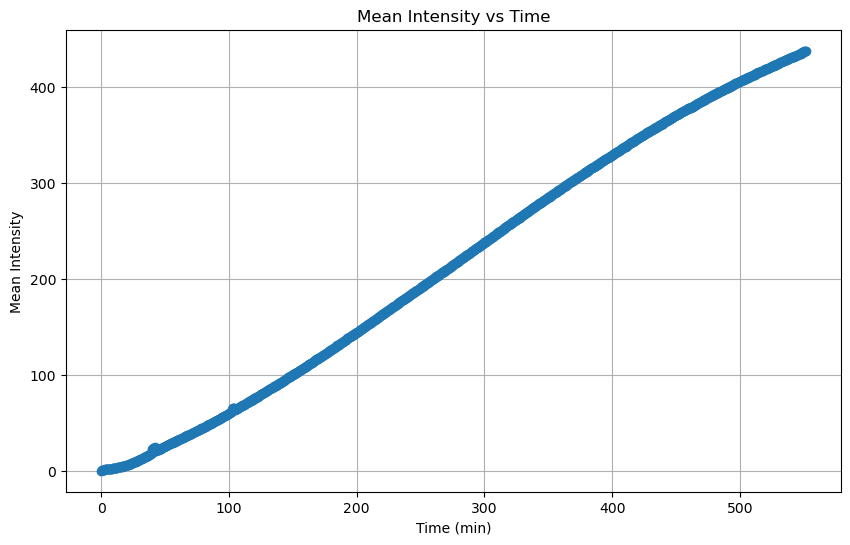

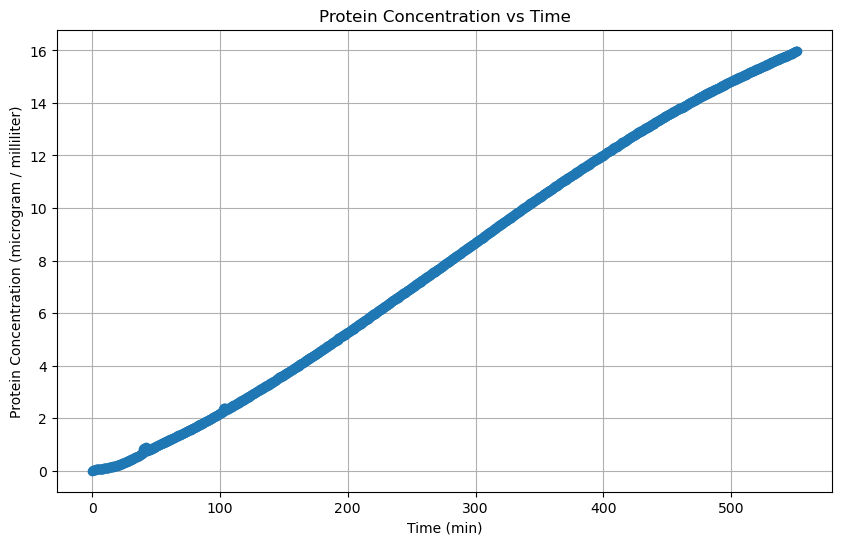

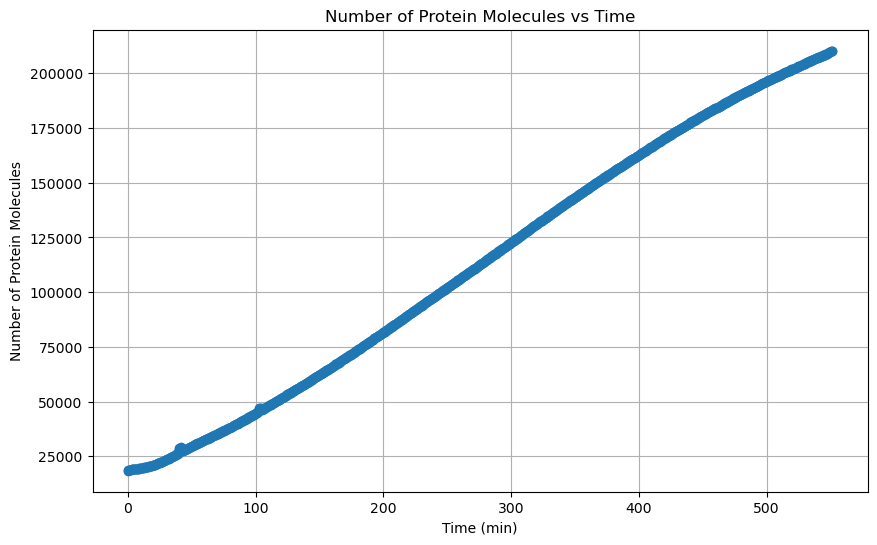

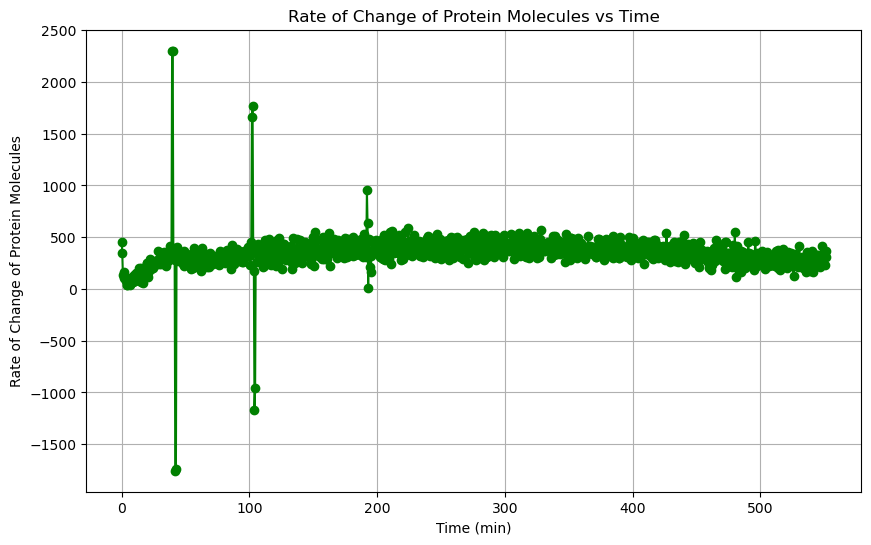

In [28]:
# Generate plots from the saved CSV file
read_data_and_generate_plots("k401_Data.csv")

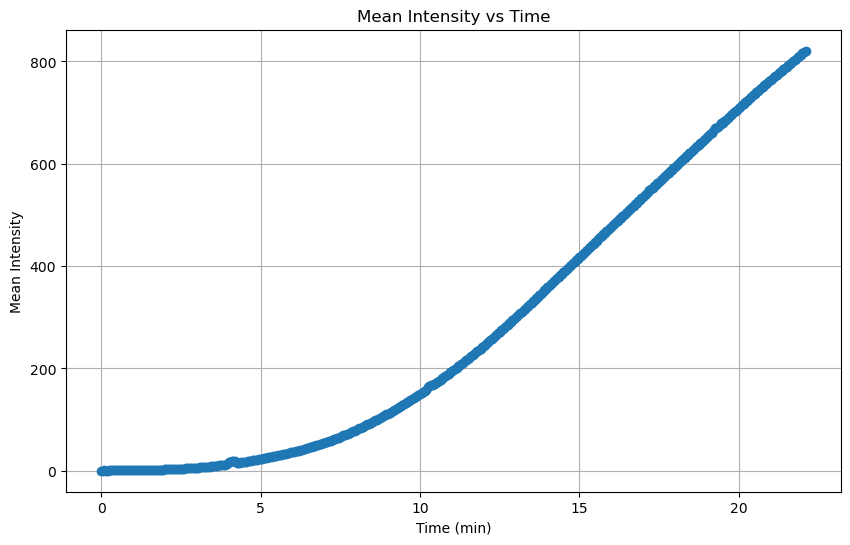

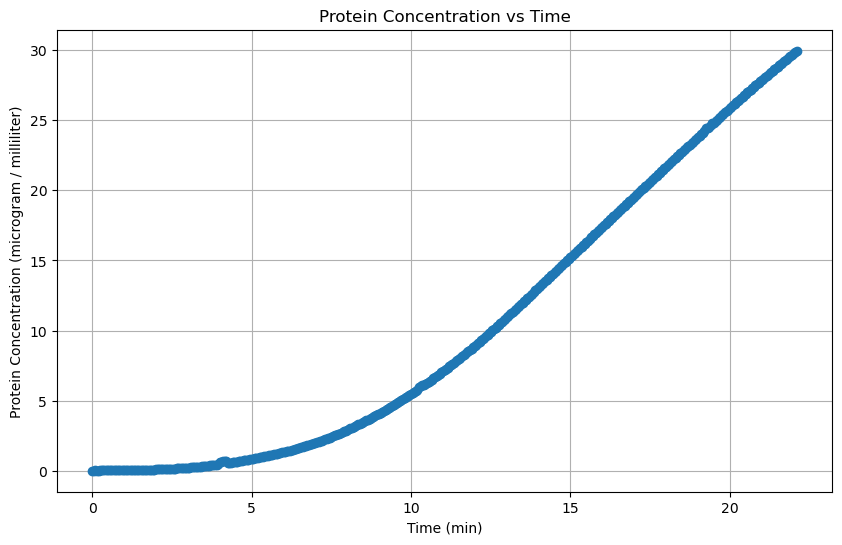

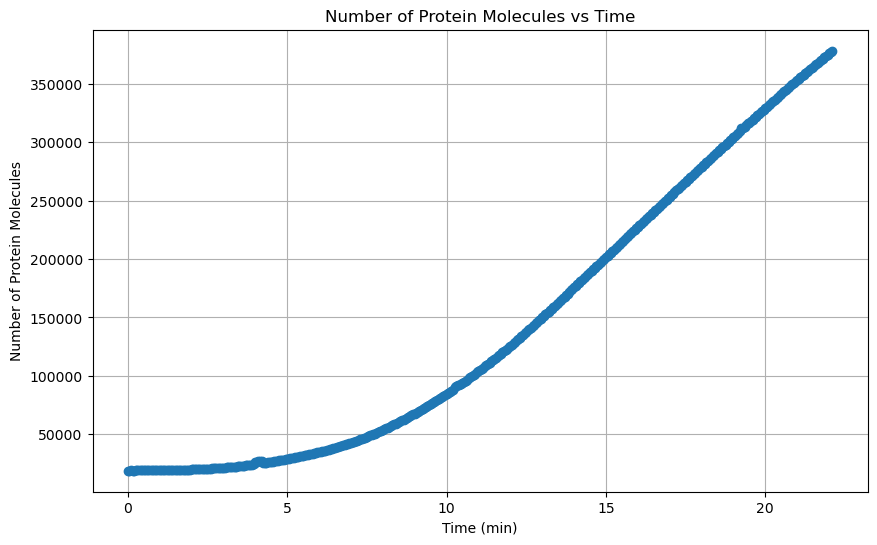

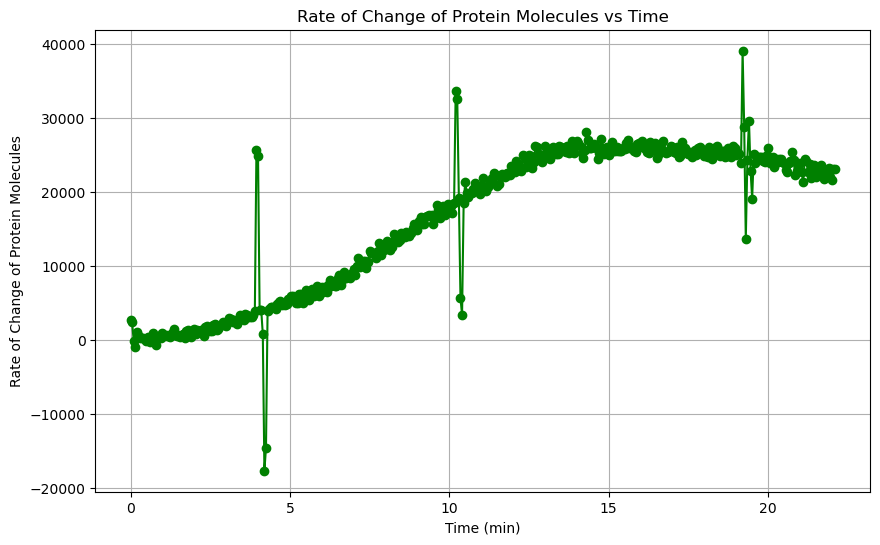

In [29]:
read_data_and_generate_plots("kif3_Data.csv")